# _**Compare Normalized water content, absolute water content and leakage**_

_Authors: Concetta D'Amato, Niccolò Tubini, Michele Bottazzi and Riccardo Rigon_


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from GEOSPACE_Output import*
from timeseries_writer import *

####### Plot settings #######
nice_fonts = {
    "legend.frameon": True, 
    "legend.fancybox": True, 
    "legend.facecolor": "white", 
    "axes.edgecolor": "0.8",
    "axes.linewidth": 0.6,
    "grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 16,
    "font.size": 16,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

oms_project_path = os.path.dirname(os.getcwd())

In [2]:
os.chdir(oms_project_path+"/data/SpikeII")
#os.listdir()

In [3]:
lab='1805_03'

In [4]:
df = pd.read_csv('vwc_hourly_Normalized_'+lab+'.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','vwc25_norm', 'vwc75_norm', 'vwc125_norm', 'vwc175_norm']
#df.set_index('Datetime',inplace=True)
df

Datetime  vwc25_norm  vwc75_norm  vwc125_norm  vwc175_norm
0    2018-05-10 00:00:00   -1.052604   -0.238697    -1.114780    -2.419537
1    2018-05-10 01:00:00   -1.052375   -0.284520    -1.105619    -2.416861
2    2018-05-10 02:00:00   -1.052144   -0.319914    -1.096354    -2.414108
3    2018-05-10 03:00:00   -1.051911   -0.349144    -1.086970    -2.411253
4    2018-05-10 04:00:00   -1.051681   -0.374307    -1.077496    -2.408275
...                  ...         ...         ...          ...          ...
1267 2018-07-01 19:00:00   -1.386328   -1.293857    -0.945385    -0.348515
1268 2018-07-01 20:00:00   -1.390568   -1.299348    -0.950455    -0.352074
1269 2018-07-01 21:00:00   -1.396023   -1.305938    -0.956753    -0.357405
1270 2018-07-01 22:00:00   -1.400751   -1.311664    -0.962110    -0.361832
1271 2018-07-01 23:00:00   -1.405149   -1.316994    -0.967046    -0.365956

[1272 rows x 5 columns]

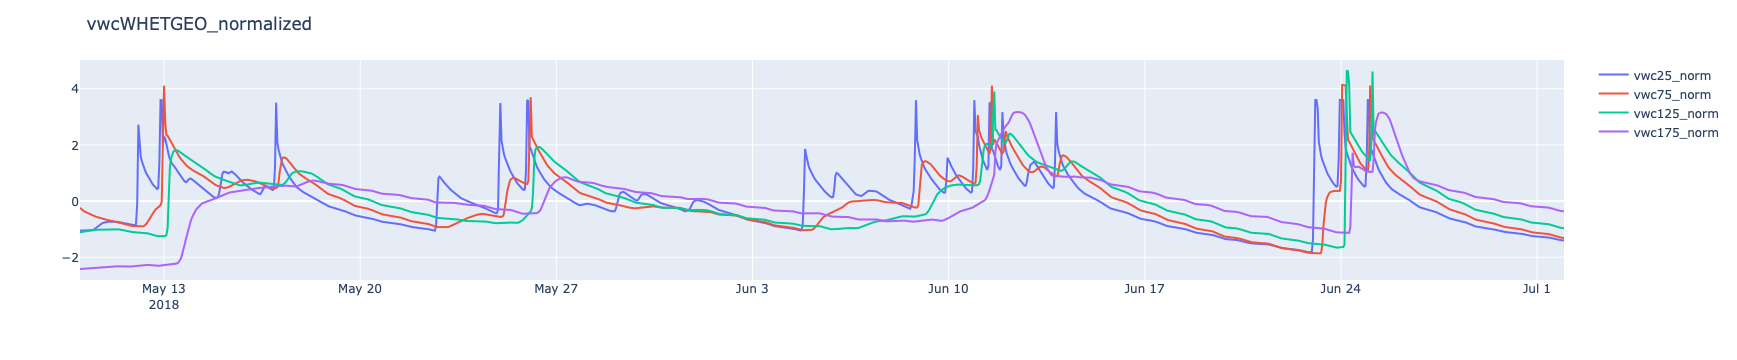

In [5]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc25_norm'], mode='lines', name='vwc25_norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc75_norm'], mode='lines', name='vwc75_norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc125_norm'], mode='lines', name='vwc125_norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc175_norm'], mode='lines', name='vwc175_norm'))
fig.update_layout(title= 'vwcWHETGEO_normalized')
fig.show()

In [6]:
df2 = pd.read_csv('vwcSpikeII_hourly_Normalized.csv',skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime','vwcA25norm', 'vwcB25norm', 'vwcA75norm', 'vwcC75norm', 'vwcA125norm', 'vwcB125norm', 'vwcB175norm', 'vwcC175norm']
#df2.set_index('Datetime',inplace=True)
df2

Datetime  vwcA25norm  vwcB25norm  vwcA75norm  vwcC75norm  \
0    2018-05-10 00:00:00    0.680924    0.538536    1.041707    0.773869   
1    2018-05-10 01:00:00    0.680924    0.538536    1.041707    0.773869   
2    2018-05-10 02:00:00    0.680924    0.538536    1.041707    0.773869   
3    2018-05-10 03:00:00    0.680924    0.538536    1.041707    0.773869   
4    2018-05-10 04:00:00    0.680924    0.538536    1.041707    0.773869   
...                  ...         ...         ...         ...         ...   
1267 2018-07-01 19:00:00   -0.804410   -0.822126   -0.332293   -0.725158   
1268 2018-07-01 20:00:00   -0.804410   -0.670941   -0.332293   -0.725158   
1269 2018-07-01 21:00:00   -0.804410   -0.670941   -0.332293   -0.725158   
1270 2018-07-01 22:00:00   -0.804410   -0.670941   -0.332293   -0.725158   
1271 2018-07-01 23:00:00   -0.804410   -0.670941   -0.332293   -0.725158   

      vwcA125norm  vwcB125norm  vwcB175norm  vwcC175norm  
0        0.056345     1.194097     0.183571    -1.603084  
1        0.056345     1.194097     0.183571    -1.603084  
2        0.056345     1.015802     0.183571    -1.603084  
3        0.056345     0.480919     0.183571    -1.603084  
4        0.056345     0.480919     0.183571    -1.603084  
...           ...          ...          ...          ...  
1267     0.056345    -0.232259     0.183571     0.189566  
1268     0.056345    -0.232259     0.183571     0.189566  
1269     0.056345    -0.232259     0.183571     0.189566  
1270     0.056345    -0.232259     0.183571     0.189566  
1271     0.056345    -0.232259     0.183571     0.189566  

[1272 rows x 9 columns]

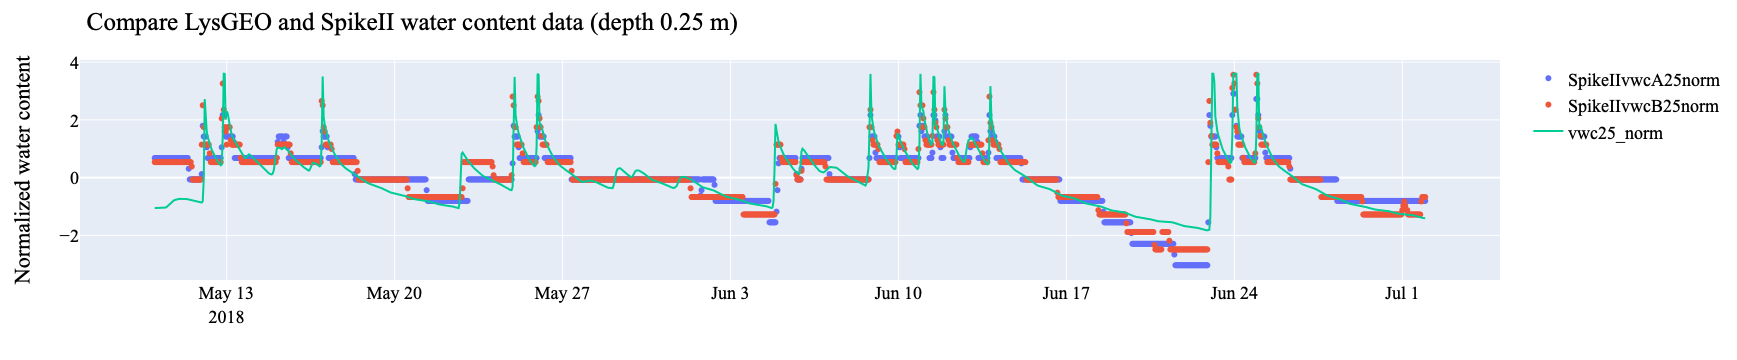

In [7]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA25norm'], mode='markers', name='SpikeIIvwcA25norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB25norm'], mode='markers', name='SpikeIIvwcB25norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc25_norm'], mode='lines', name='vwc25_norm'))
fig.update_layout(
        title='Compare LysGEO and SpikeII water content data (depth 0.25 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=18))
fig.show()

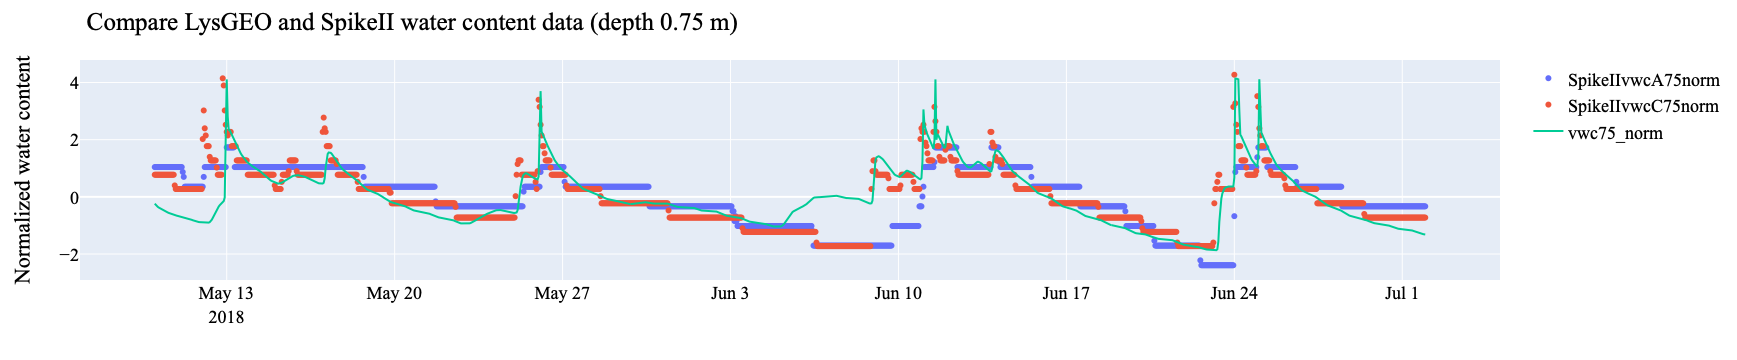

In [8]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA75norm'], mode='markers', name='SpikeIIvwcA75norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC75norm'], mode='markers', name='SpikeIIvwcC75norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc75_norm'], mode='lines', name='vwc75_norm'))
fig.update_layout(title= 'vwc75_norm')
fig.update_layout(
        title='Compare LysGEO and SpikeII water content data (depth 0.75 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=18))
fig.show()


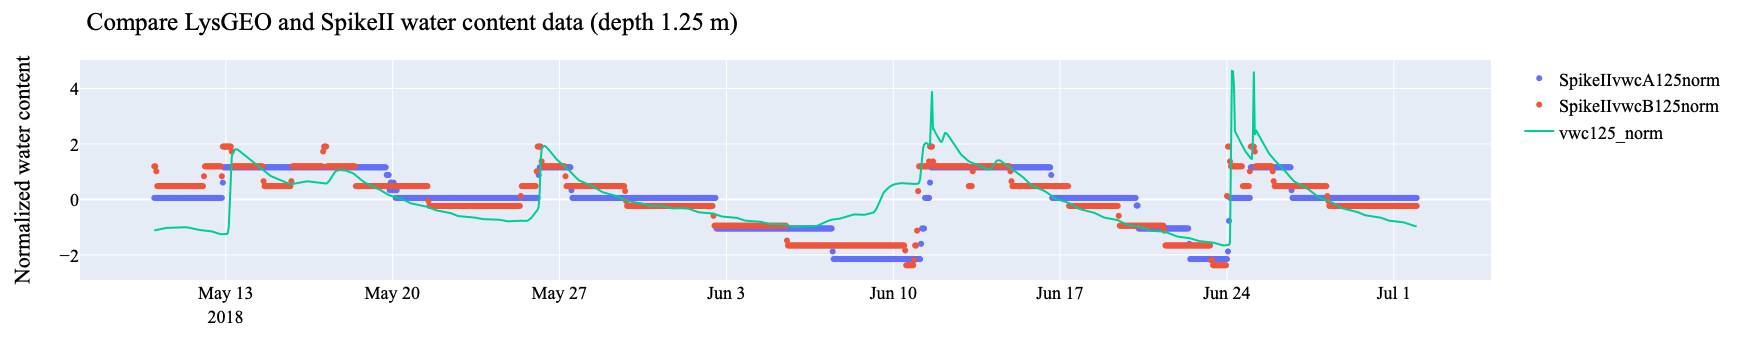

In [9]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA125norm'], mode='markers', name='SpikeIIvwcA125norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB125norm'], mode='markers', name='SpikeIIvwcB125norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc125_norm'], mode='lines', name='vwc125_norm'))
fig.update_layout(
        title='Compare LysGEO and SpikeII water content data (depth 1.25 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=18))
fig.show()

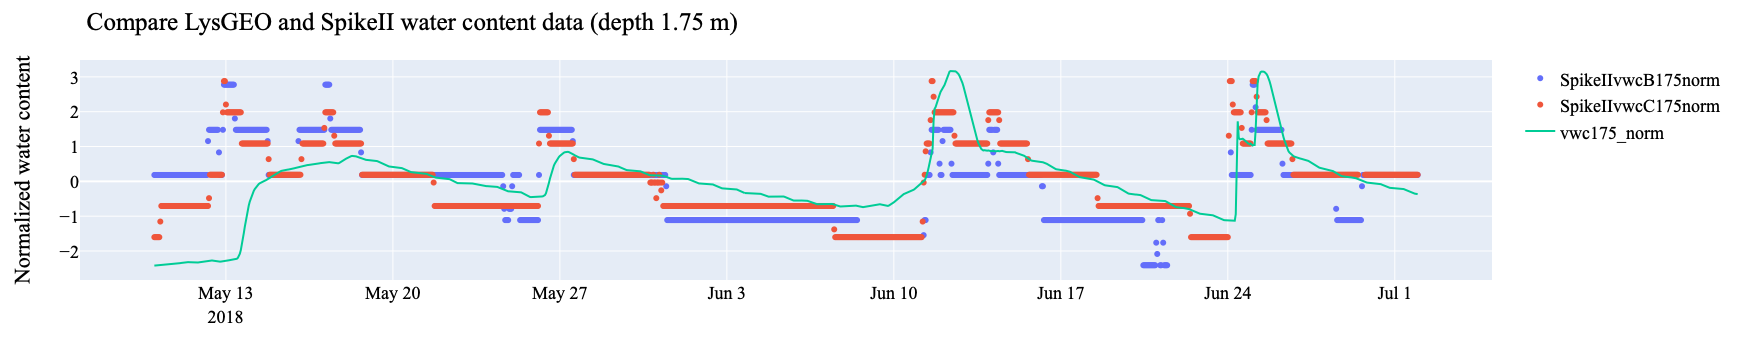

In [10]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB175norm'], mode='markers', name='SpikeIIvwcB175norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC175norm'], mode='markers', name='SpikeIIvwcC175norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc175_norm'], mode='lines', name='vwc175_norm'))
fig.update_layout(
        title='Compare LysGEO and SpikeII water content data (depth 1.75 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=18))
fig.show()

## Compare absolute water content values

In [11]:
df2 = pd.read_csv('vwcSpikeII_hourly.csv',skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime','vwcA25', 'vwcB25', 'vwcA75', 'vwcC75', 'vwcA125', 'vwcB125', 'vwcB175', 'vwcC175']
#df.set_index('Datetime',inplace=True)
#df2

In [12]:
df = pd.read_csv('vwc_hourly_'+lab+'.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','vwc25mean', 'vwc75mean', 'vwc125mean', 'vwc175mean']
#df2.set_index('Datetime',inplace=True)
#df

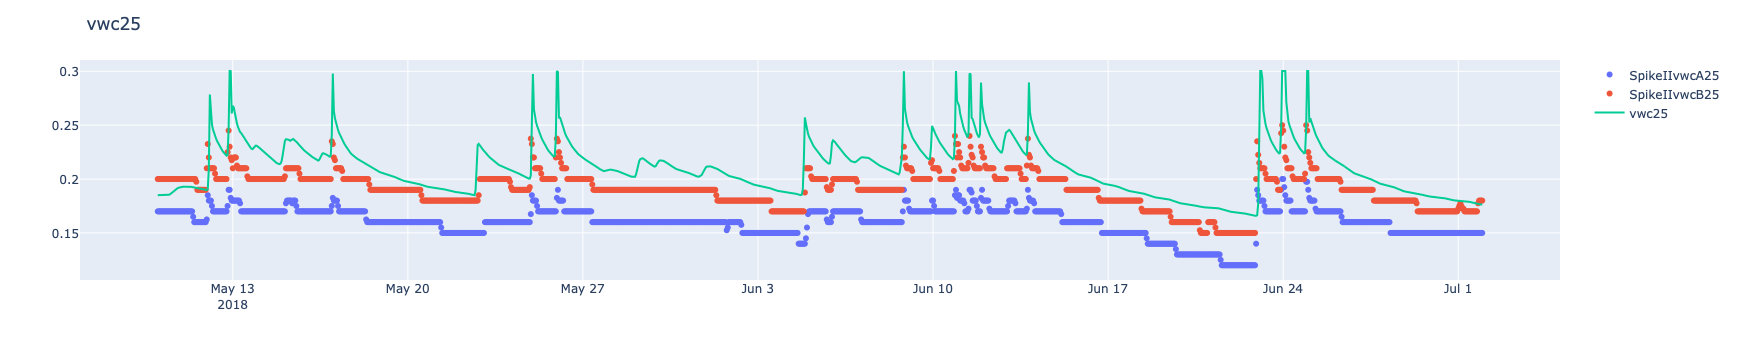

In [13]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA25'], mode='markers', name='SpikeIIvwcA25'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB25'], mode='markers', name='SpikeIIvwcB25'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc25mean'], mode='lines', name='vwc25'))
fig.update_layout(title= 'vwc25')
fig.show()

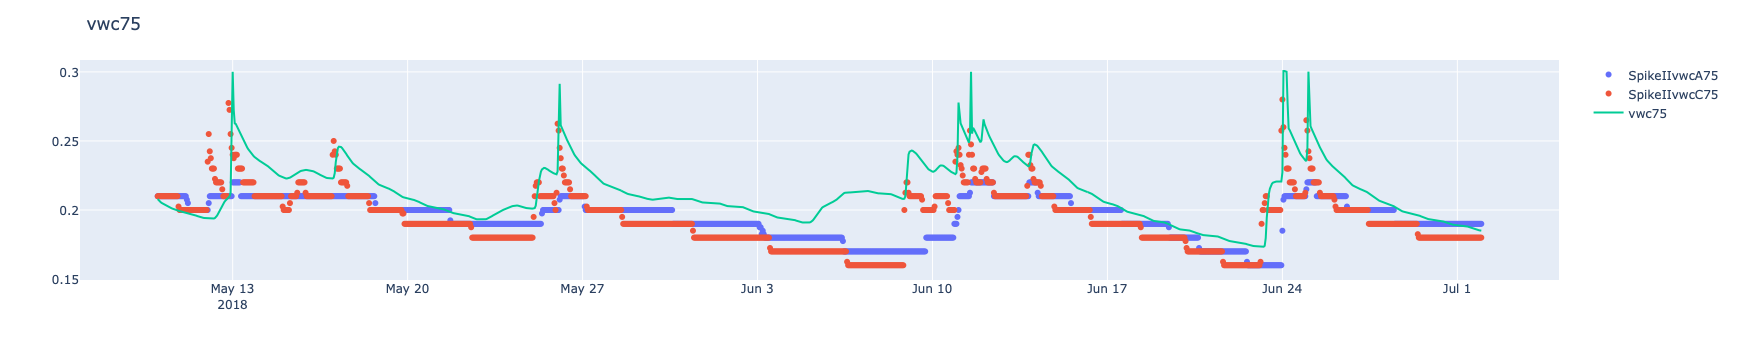

In [14]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA75'], mode='markers', name='SpikeIIvwcA75'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC75'], mode='markers', name='SpikeIIvwcC75'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc75mean'], mode='lines', name='vwc75'))
fig.update_layout(title= 'vwc75')
fig.show()

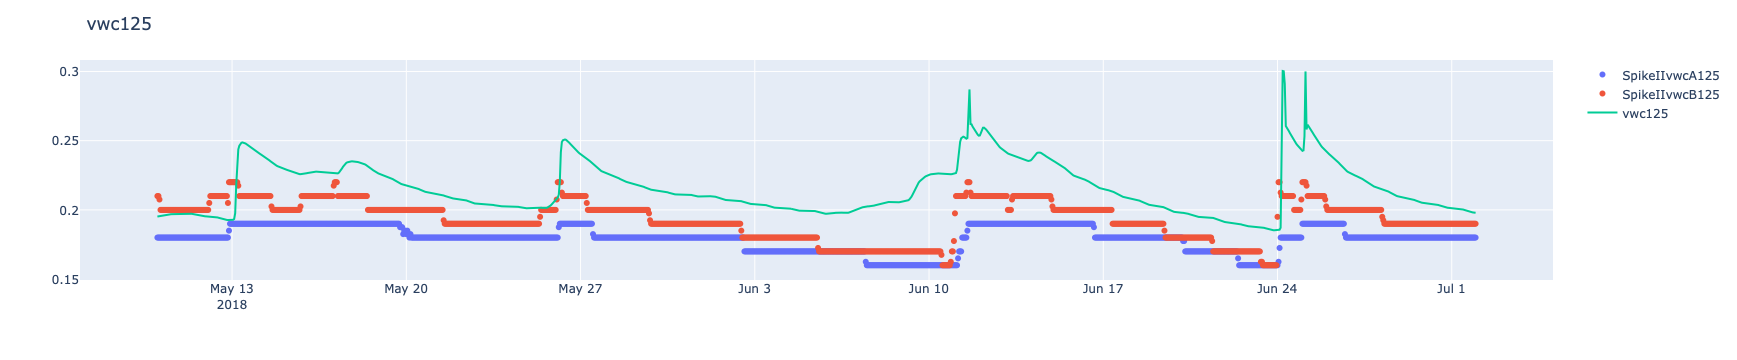

In [15]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA125'], mode='markers', name='SpikeIIvwcA125'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB125'], mode='markers', name='SpikeIIvwcB125'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc125mean'], mode='lines', name='vwc125'))
fig.update_layout(title= 'vwc125')
fig.show()

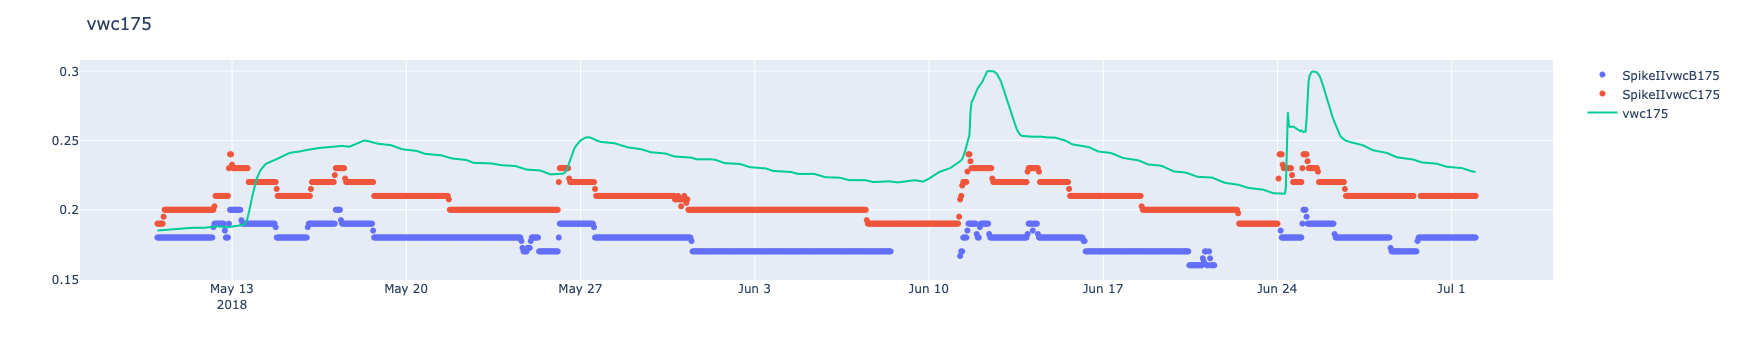

In [16]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB175'], mode='markers', name='SpikeIIvwcB175'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC175'], mode='markers', name='SpikeIIvwcC175'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc175mean'], mode='lines', name='vwc175'))
fig.update_layout(title= 'vwc175')
fig.show()

## Compare leakage

In [17]:
df = pd.read_csv('LeakageSpikeII_h_hourly.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','Leakage_h']
#df.set_index('Datetime',inplace=True)
#df2

In [18]:
df1 = pd.read_csv('Leakage_mm_h_'+lab+'.csv',skiprows=6,parse_dates=[1])
df1 = df1.drop(['Format'],axis=1) 
df1.columns = ['Datetime','Leakage_mm_h']
#df.set_index('Datetime',inplace=True)
#df2

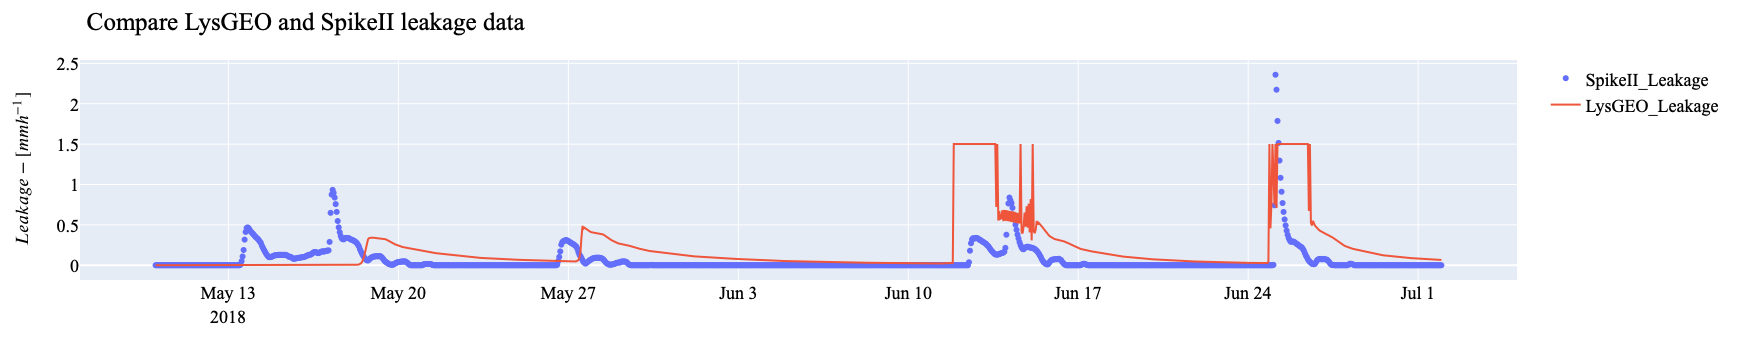

In [19]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['Leakage_h'], mode='markers', name='SpikeII_Leakage'))
fig.add_trace(go.Scatter(x=df1['Datetime'], y=df1['Leakage_mm_h'], mode='lines', name='LysGEO_Leakage'))
#fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_02'))
#fig.add_trace(go.Scatter(x=df3['Datetime'], y=df3['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_03'))
#fig.add_trace(go.Scatter(x=df4['Datetime'], y=df4['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_04'))
#fig.add_trace(go.Scatter(x=df5['Datetime'], y=df5['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_05'))
fig.update_layout(
        title='Compare LysGEO and SpikeII leakage data',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Leakage -[mm h^{-1}]$",
        #legend_title="Date",
        font=dict(size=18))
fig.show()

In [27]:
leakageSpikeII= df.Leakage_h.sum()
leakageSpikeII

82.87054999999998

In [28]:
leakageLysGEO= df1.Leakage_mm_h.sum()
leakageLysGEO

267.2240761088502

In [22]:
error=abs(((leakageSpikeII-leakageLysGEO)/leakageSpikeII)*100)
error

222.45963868811089

In [23]:
leakageSpikeII-leakageLysGEO

-184.35352610885025

In [24]:
Area=np.pi*(26/2)**2
Area

530.929158456675

In [25]:
mmacqua=50/Area
mmacqua

0.09417452253958304

In [26]:
TotmmAcquaTolti=mmacqua*2*8
TotmmAcquaTolti

1.5067923606333287